## 실습 2.4.1

A=[2 -1; -1 2];
[V,D]=eig(A);
[d,ind]=sort(diag(D));
Ds=D(ind,ind);
Vs=V(;,ind);

In [1]:
import numpy as np

# 행렬 정의
A = np.array([[-2, 1, 0],
              [1, -2, 1],
              [0, 1, -2]])

# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

# 고유값 정렬 및 정렬된 인덱스 가져오기
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]

print(sorted_eigenvalues) #ground state energy? it is noted that the eigenvalue is -k^2*(Delta_x)^2, therefore, -0.5858 is for the smallest k^w.

# 고유값 행렬 (대각 행렬 형태로 변환)
Ds = np.diag(sorted_eigenvalues) # 대각행렬이 eigenvalues

# 고유벡터 정렬
Vs = eigenvectors[:, sorted_indices]

# 결과 출력
print("Sorted Eigenvalues (Diagonal Matrix):\n", Ds)
print("Sorted Eigenvectors:\n", Vs)

[-3.41421356 -2.         -0.58578644]
Sorted Eigenvalues (Diagonal Matrix):
 [[-3.41421356  0.          0.        ]
 [ 0.         -2.          0.        ]
 [ 0.          0.         -0.58578644]]
Sorted Eigenvectors:
 [[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -4.05405432e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


In [2]:
q=1.609e-19
h=6.626e-34
hbar=h/(2*np.pi)
w=5e-9
m0=9.109e-31
m=m0*0.91

Delta_x=w/4 #k^2*Delta_x^2 = 0.58578
k2=0.5858/Delta_x**2 #unit m2, compare it with the analytic soulution (pi/a)^2
Anal_k2=(np.pi/w)**2

print(k2)
print(Anal_k2)

E=hbar**2/(2*m)*k2 #unit J
E_ev=E/q #unit eV

print(E)
print(E_ev)


3.7491199999999994e+17
3.947841760435743e+17
2.5149559207478693e-21
0.015630552646040206


### 실습 2.4.2

q=1.609e-19
h=6.626e-34
hbar=h/(2*np.pi)
w=5e-9
m0=9.109e-31
m=m0*0.91
N=5
N1=N-2; dx=w/(N-1);
i=1; j=1; A=zeros(N1,N1);
while i<=N1
    if i==1
        A(i,j)=-2; A(i,j+1)=1;
    elseif i==N1
        A(i,j-1)=1; A(i,j)=-2;
    else
        A(i,j-1)=1; A(i,j)=-2; A(i,j+1)=1;
    end
        j=i+1; j=j+1;
end
[V,D]=eig(A); [d,ind]=sort(diag(D),'descend');
E=hbar*hbar*(-d)/(2*m*dx*dx*q);
n=1;
En=zeros(N1,1);
while n<=N1
En(n,1)=hbar*hbar*(n*pi/w)^2/(2*m*q);
n=n+1;
end
Ds=D(ind,ind);
Vs=V(;,ind);


Numerical Energies (E):
 [ 0.01645341  0.06574603  0.14767532  0.26190459  0.40796447  0.58525475
  0.79304692  1.03048711  1.29659964  1.59029098  1.91035429  2.25547437
  2.62423305  3.01511501  3.42651405  3.85673962  4.30402384  4.76652874
  5.24235376  5.72954365  6.22609644  6.72997169  7.23909886  7.75138585
  8.26472755  8.77701453  9.2861417   9.79001695 10.28656974 10.77375963
 11.24958466 11.71208955 12.15937377 12.58959935 13.00099838 13.39188034
 13.76063902 14.1057591  14.42582242 14.71951376 14.98562628 15.22306647
 15.43085864 15.60814893 15.7542088  15.86843808 15.95036736 15.99965998]
Analytical Energies (En):
 [1.64590487e-02 6.58361946e-02 1.48131438e-01 2.63344778e-01
 4.11476216e-01 5.92525751e-01 8.06493384e-01 1.05337911e+00
 1.33318294e+00 1.64590487e+00 1.99154489e+00 2.37010301e+00
 2.78157922e+00 3.22597354e+00 3.70328595e+00 4.21351645e+00
 4.75666506e+00 5.33273176e+00 5.94171656e+00 6.58361946e+00
 7.25844045e+00 7.96617955e+00 8.70683674e+00 9.48041202e+

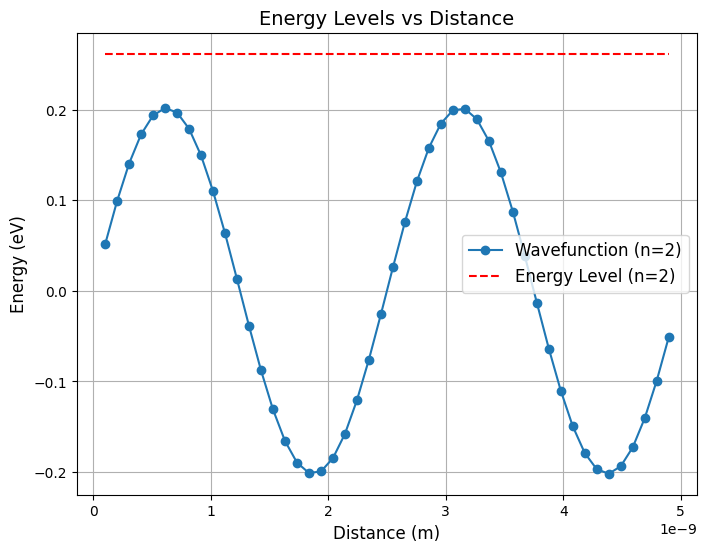

In [3]:
import numpy as np

# 상수 정의
q = 1.609e-19  # 전자전하 (C)
h = 6.626e-34  # 플랑크 상수 (J·s)
hbar = h / (2 * np.pi)  # 줄어진 플랑크 상수
w = 5e-9  # 우물 폭 (m)
m0 = 9.109e-31  # 전자 질량 (kg)
m = m0 * 0.91  # 수정된 질량
N = 50  # 총 점 개수
N1 = N - 2  # 내부 점 개수
dx = w / (N - 1)  # 간격

# A 행렬 초기화
A = np.zeros((N1, N1))

# A 행렬 구성
for i in range(N1):
    if i == 0:
        A[i, i] = -2
        A[i, i + 1] = 1
    elif i == N1 - 1:
        A[i, i - 1] = 1
        A[i, i] = -2
    else:
        A[i, i - 1] = 1
        A[i, i] = -2
        A[i, i + 1] = 1

# 고유값 및 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

# 고유값 정렬 및 정렬된 인덱스 가져오기
sorted_indices = np.argsort(-eigenvalues)  # 내림차순 정렬
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 에너지 계산
E = hbar**2 * (-sorted_eigenvalues) / (2 * m * dx**2 * q)

# 분석적인 에너지 레벨 계산
En = np.zeros(N1)
for n in range(1, N1 + 1):
    En[n - 1] = hbar**2 * (n * np.pi / w)**2 / (2 * m * q)

# 결과 출력
print("Numerical Energies (E):\n", E)
print("Analytical Energies (En):\n", En)



import matplotlib.pyplot as plt

x_positions = np.linspace(dx, w - dx, N1)

# 그래프 그리기
plt.figure(figsize=(8, 6))

plt.plot(x_positions,sorted_eigenvectors[:, 3],'o-',label=f'Wavefunction (n=2)')
plt.plot(x_positions, E[3] * np.ones(N1), 'r--', label=f'Energy Level (n=2)')

'''
for n in range(N1):
    plt.plot(
        x_positions,
        sorted_eigenvectors[:, 3],
        label=f'Wavefunction (n=3)'
    )
'''
#plt.plot(x_positions, E, o-'', label='Numerical Energy (E)')
#plt.plot(x_positions, En, 's--', label='Analytical Energy (En)')

# 축 라벨 및 제목
plt.xlabel('Distance (m)', fontsize=12)
plt.ylabel('Energy (eV)', fontsize=12)
plt.title('Energy Levels vs Distance', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
